In [1]:
import numpy as np
from sklearn.datasets import make_classification
from cop_kmeans import CopKMeans
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=2111)

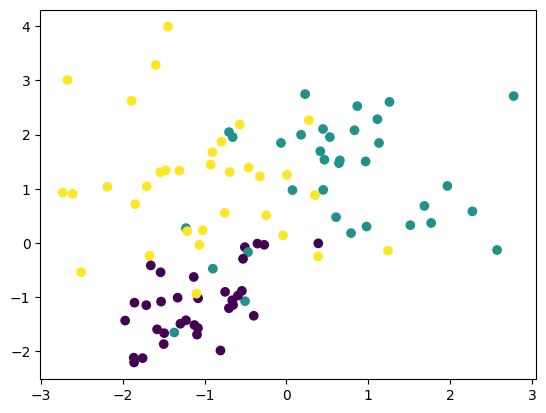

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()